<a href="https://colab.research.google.com/github/kmodi-2428/my_classwork/blob/main/Class_practice_linear_regression_7_9_%5Bupdated%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cd drive/myDrive/data

[Errno 2] No such file or directory: 'drive/myDrive/data'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear Regression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [ ]:
data=pd.read_csv("/wc-at.csv")


In [ ]:
data.head(5)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


# plot


<ipython-input-12-648e51e4ea2a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")   # back groun dark grid


Text(0, 0.5, 'AT')

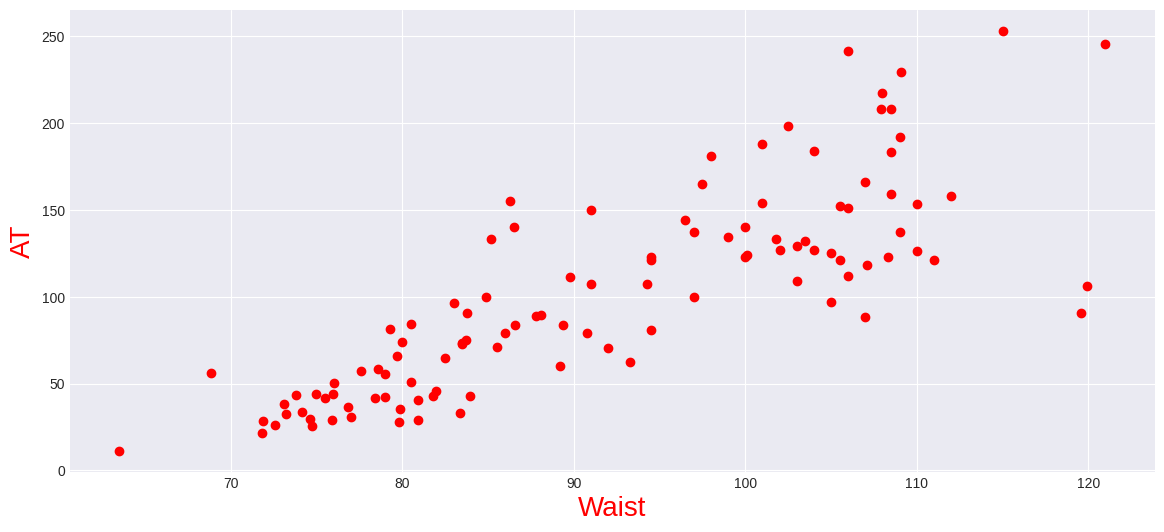

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")   # back groun dark grid
plt.scatter(data["Waist"],data["AT"],color="red")
plt.xlabel("Waist",size=20,color="red")
plt.ylabel("AT",size=20,color="red")



In [ ]:
data.corr()# -1<p<+1

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


# another module for LR

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# this line help us to find optimal m and c ==> yhat = mx+c
model=smf.ols("AT~Waist",data=data).fit()    # ordinary list square = ols


In [ ]:
model.summary()  # .fit() using for summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.62e-27
Time:                        05:11:25   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# yhat = 3.45 x -215.98

'''
x(wc)=80
yhat 3.80*80-215.98

yhat = 276-215.98 = 60.02
'''

<ipython-input-17-a52e7a4651cf>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'AT')

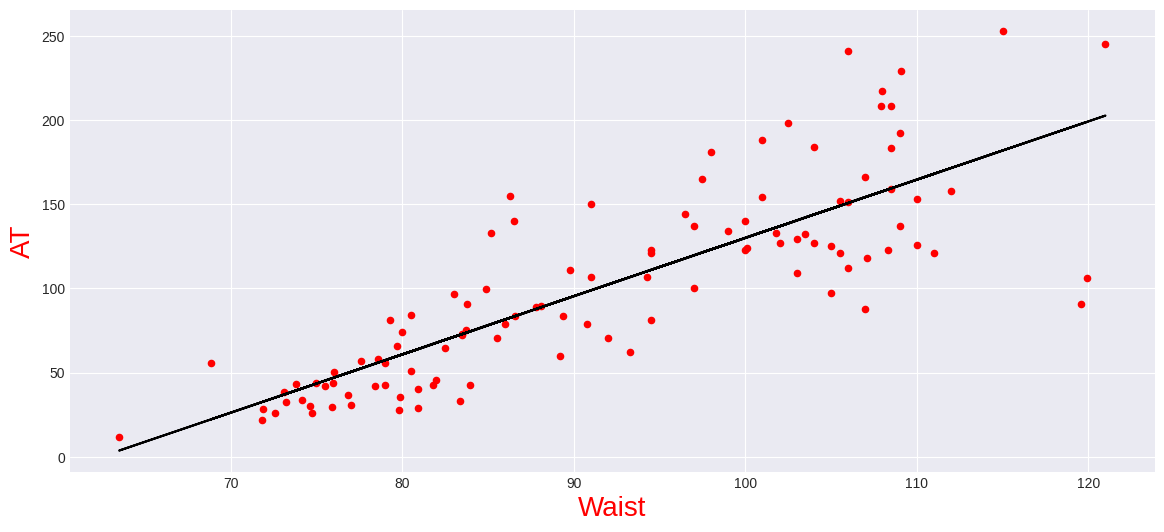

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["Waist"],data["AT"],color="red",s=20) #sctter plot (s = size)
plt.plot(data["Waist"],model.predict(),color="black") #best line, (model.predict = yhat)


plt.xlabel("Waist",size=20,color="red")
plt.ylabel("AT",size=20,color="red")




In [ ]:
# improving model performance

"""


yhat=mx+c ==>67%

yhat=mlog(x)+c ==>67.5%

log(yhat)=mx+c

log(yhat)=m1x+m2x^2+c



"""
#yhat=mlog(x)+c formula
# where yhat = AT
# and   x = log(waist)

model2=smf.ols("AT~np.log(Waist)",data=data).fit()
model2.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           6.80e-28
Time:                        05:28:39   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2=smf.ols("np.log(AT)~(Waist)",data=data).fit()
model2.summary()

# using log(yhat)=mx+c formula
#where log(yhat)= np.log(AT)
      # x = waist


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           2.68e-30
Time:                        05:27:24   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2=smf.ols("np.log(AT)~Waist+pow(Waist,2)",data=data).fit()
model2.summary()

# log(yhat)=m1x+m2x^2+c  using power in m2 x
 # where y = (AT)
 # x= waist



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.80e-35
Time:                        07:57:42   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist             0.2289      0.032      7.107      0.000       0.165       0.293
pow(Waist, 2)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2=smf.ols("np.log(AT)~(Waist)",data=data).fit()
model2.summary()





Text(0, 0.5, 'AT')

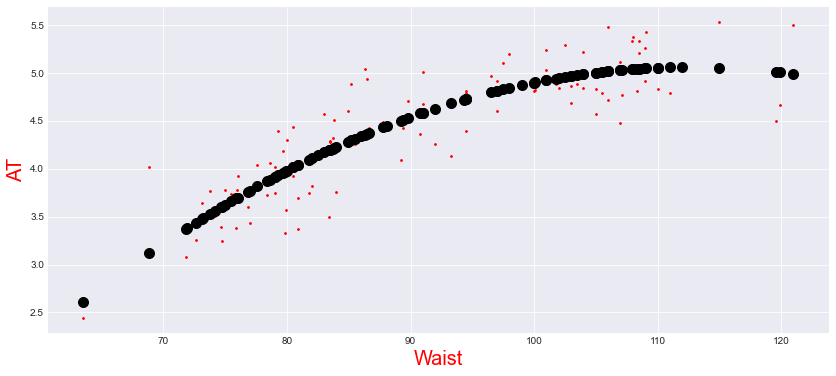

In [ ]:
model4=smf.ols("np.log(AT)~Waist+pow(Waist,2)",data=data).fit()
model4.summary()



plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["Waist"],np.log(data["AT"]),color="red",s=3)
plt.scatter(data["Waist"],model4.fittedvalues,color="black",s=100)


plt.xlabel("Waist",size=20,color="red")
plt.ylabel("AT",size=20,color="red")




In [ ]:
data=np.random.normal(0,1,1000000)

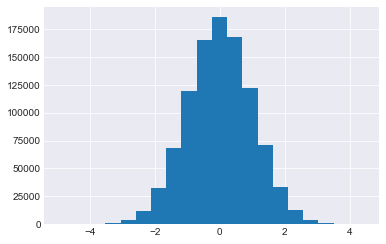

In [ ]:
plt.hist(data,bins=20)
plt.show()